In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('data/air_quality_readings.csv')
print("total rows:", len(data))

print("Number of samples for each category:")
print(data['health_environment'].value_counts())

total rows: 2000
Number of samples for each category:
health_environment
unhealthy    1668
moderate      288
good           44
Name: count, dtype: int64


In [5]:
data.drop(columns=['sensor_id', "timestamp"], inplace=True)

print("Missing values in each column:")
missing_values = data.isnull().sum()
print(missing_values)

if missing_values.sum() > 0:
    missing_columns = missing_values[missing_values > 0].index.tolist()
    print("\nColumns with missing values:", missing_columns)
    data.dropna(inplace=True)
    print("Dropped rows with missing values.")


Missing values in each column:
pm2_5                 0
pm10                  0
so2                   0
no2                   0
health_environment    0
dtype: int64


In [7]:
le = LabelEncoder()
data["health_environment_encoded"] = le.fit_transform(data["health_environment"])
print(data["health_environment_encoded"])
print(data["health_environment_encoded"].value_counts())

0       2
1       2
2       1
3       2
4       1
       ..
1995    2
1996    2
1997    2
1998    2
1999    2
Name: health_environment_encoded, Length: 2000, dtype: int32
health_environment_encoded
2    1668
1     288
0      44
Name: count, dtype: int64


In [8]:
X = data[["pm2_5", "pm10", "so2", "no2"]]
y = data["health_environment_encoded"]
print(X)
print(y)

       pm2_5    pm10     so2     no2
0     206.35  229.01  137.85  255.07
1     194.68  440.43  128.55   41.25
2     242.37   13.70   85.80  140.20
3     179.41  359.75  111.08  412.63
4      50.81  130.90  291.95   58.31
...      ...     ...     ...     ...
1995  102.42  154.24  281.81  243.71
1996  186.75  421.00    2.62  274.34
1997  206.49  101.35  213.05  175.87
1998  127.94  297.91   79.35  247.34
1999  227.76  490.34   18.86  107.82

[2000 rows x 4 columns]
0       2
1       2
2       1
3       2
4       1
       ..
1995    2
1996    2
1997    2
1998    2
1999    2
Name: health_environment_encoded, Length: 2000, dtype: int32


In [9]:
scalar = StandardScaler() 
X_scaled = scalar.fit_transform(X)

print(X_scaled)

[[ 1.12107266 -0.16055253 -0.13062129  0.04247002]
 [ 0.957652    1.31519085 -0.23807802 -1.60554149]
 [ 1.62547816 -1.66344869 -0.73203236 -0.84288721]
 ...
 [ 1.12303315 -1.05163852  0.73827618 -0.56796171]
 [ 0.02305947  0.32037982 -0.80655881 -0.01710874]
 [ 1.42088726  1.66357015 -1.50548976 -1.09245513]]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.8, random_state=42, stratify=y)

print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print(X_train)
print(y_train)
print(X_test)
print(y_test)

Train set size: 1600
Test set size: 400
[[ 1.57464552 -1.70260734  1.10640215 -1.05091186]
 [ 1.07682165  0.68355705 -0.26268908  0.71248049]
 [ 1.34512841 -1.69276532 -0.18030558 -0.00385189]
 ...
 [-0.93169809 -0.63408593 -0.08209244  0.82084754]
 [ 0.7438188   0.75203232 -0.43993492  1.25685919]
 [-0.04933855  0.5887666  -0.15777433  0.27215266]]
1723    2
1461    2
1550    2
701     2
1598    1
       ..
1129    2
103     2
1546    2
3       2
812     2
Name: health_environment_encoded, Length: 1600, dtype: int32
[[ 0.63795246 -0.09263567 -1.16151266  1.31528182]
 [-1.22549118 -1.2179755  -0.43669966  1.77364513]
 [-1.08461613  0.03991739  1.62485201  1.2534679 ]
 ...
 [-0.60667722  1.07193261  0.60054669  0.01271918]
 [ 0.05680786  0.64558503  0.40030742 -1.50688586]
 [-1.17423843 -1.07355619 -0.36251985  0.68111108]]
988     2
945     2
1167    2
223     2
1589    2
       ..
870     2
501     1
878     2
1018    2
1386    2
Name: health_environment_encoded, Length: 400, dtype: i

In [12]:
clf = RandomForestClassifier(random_state=42)
print(clf)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


RandomForestClassifier(random_state=42)

In [16]:
y_pred = clf.predict(X_test)
print(y_pred)
print("classification report")
print(classification_report(y_test, y_pred, target_names=le.classes_))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 0 1 2 2 2 2 1 2 2 2 2 1 2 2 1 2
 2 2 1 2 2 2 2 2 1 2 2 2 1 2 1 0 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2 0 2
 2 2 2 2 1 1 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 0 2 2 2 2 1 1 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 0 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 1 2 1
 2 2 2 2 2 2 1 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2
 2 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2]
classification report
              precision    recall  f1-score   support

        good       1.00      1.00      1.00         9
    moderate       0.95      0.96      0.96        57
   

In [ ]:
new_data = np.array([[140.18, 118.10000, 144.89, 81.52]])
new_data_scaled = scalar.transform(new_data)
y_pred = clf.predict(new_data_scaled)
predicted_category = le.inverse_transform(y_pred)

print(predicted_category)

['unhealthy']


In [21]:
# build regression model for temperature prediciton from humidity
data = pd.read_csv('data/temperature_humidity.csv')
data.drop(columns=['sensor_id', "timestamp", "temperature_f"], inplace=True)
data.dropna(inplace=True)
print(data)


       temperature  humidity
0             22.0     80.99
1             22.0     79.72
2             22.0     81.29
3             22.0     83.04
4             22.0     79.53
...            ...       ...
86395         22.0     80.43
86396         22.0     78.90
86397         22.0     77.12
86398         22.0     79.42
86399         22.0     80.37

[86400 rows x 2 columns]


In [26]:
X = data[["humidity"]]
y = data["temperature"]
print(X)
print(y)

       humidity
0         80.99
1         79.72
2         81.29
3         83.04
4         79.53
...         ...
86395     80.43
86396     78.90
86397     77.12
86398     79.42
86399     80.37

[86400 rows x 1 columns]
0        22.0
1        22.0
2        22.0
3        22.0
4        22.0
         ... 
86395    22.0
86396    22.0
86397    22.0
86398    22.0
86399    22.0
Name: temperature, Length: 86400, dtype: float64


In [42]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
print(X_scaled)


[[ 0.09764458]
 [-0.02802742]
 [ 0.12733088]
 ...
 [-0.28530866]
 [-0.05771371]
 [ 0.0362929 ]]


In [61]:
import sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [62]:
y_pred = model.predict(X_test)
print(y_pred)

[26.94645733 27.24891262 24.36838611 ... 15.85162943 15.82762504
 29.65415224]


In [63]:
print(y_test)

13001    27.68
28874    28.04
37824    24.67
60440    15.35
64454    15.00
         ...  
80102    18.90
55378    16.58
67054    15.09
69820    15.46
29281    27.94
Name: temperature, Length: 17280, dtype: float64


In [64]:
mse = np.mean((y_test - y_pred) ** 2)

In [65]:
print("Mean squared error:")
print(mse)

Mean squared error:
0.9756606792156055


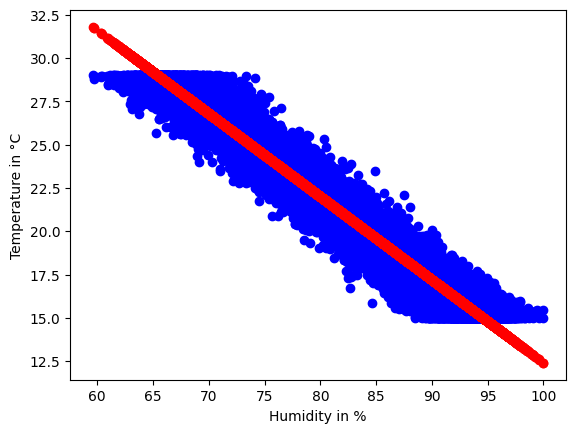

In [67]:
from matplotlib import pyplot as plt
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Humidity in %')
plt.ylabel('Temperature in °C')
plt.show()